# Requisitos Obligatorios

- Modelos Scikit-learn: Usa al menos estos modelos (sí, en serio). Regresión Lineal, Regresión Logística, Árboles de Decisión, Random Forest, Gradient Boosting, SVM, k-NN, Naive Bayes, k-Means, PCA. Prueba múltiples modelos por problema y documenta cuál fue el mejor.
- Entrena, prueba y valida cada modelo (imagina que el jefe te está mirando).
- Genera visualizaciones que se vean bien y entreguen insights 

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# Librerías de Machine Learning
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,  # Asegúrate de que esta línea esté presente
    StratifiedKFold
)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)

In [62]:
df_bank = pd.read_csv('datos/bank.csv',sep=';')
df_bankfull = pd.read_csv('datos/bank-full.csv', sep=';')

In [63]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [64]:
# Algoritmo de regresion logistica.
# Necesitamos segun la convertir las columnas a valores binarios, lo cual algunos ya lo son.
df_bank['default']=df_bank['default'].replace({'yes': 1, 'no':0})
df_bank['loan']=df_bank['loan'].replace({'yes': 1, 'no':0})
df_bank['housing']=df_bank['housing'].replace({'yes': 1, 'no':0})
df_bank['y']=df_bank['y'].replace({'yes': 1, 'no':0})
# Esto lo hacemos para mejor implementacion del modelo.

/tmp/ipykernel_8996/1065673040.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bank['default']=df_bank['default'].replace({'yes': 1, 'no':0})
/tmp/ipykernel_8996/1065673040.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bank['loan']=df_bank['loan'].replace({'yes': 1, 'no':0})
/tmp/ipykernel_8996/1065673040.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future

In [65]:
# Algoritmo de regresion logistica.
# Necesitamos segun la convertir las columnas a valores binarios, lo cual algunos ya lo son.
df_bankfull['default']=df_bankfull['default'].replace({'yes': 1, 'no':0})
df_bankfull['loan']=df_bankfull['loan'].replace({'yes': 1, 'no':0})
df_bankfull['housing']=df_bankfull['housing'].replace({'yes': 1, 'no':0})
df_bankfull['y']=df_bankfull['y'].replace({'yes': 1, 'no':0})
# Esto lo hacemos para mejor implementacion del modelo.

/tmp/ipykernel_8996/2987865632.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bankfull['default']=df_bankfull['default'].replace({'yes': 1, 'no':0})
/tmp/ipykernel_8996/2987865632.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bankfull['loan']=df_bankfull['loan'].replace({'yes': 1, 'no':0})
/tmp/ipykernel_8996/2987865632.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-

In [66]:
df_bank['job'] = df_bank['job'].apply(lambda x: 0 if x in ['retired', 'unknown','student'] else 1)

In [67]:
df_bankfull['job'] = df_bankfull['job'].apply(lambda x: 0 if x in ['retired', 'unknown','student'] else 1)

In [68]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,1,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,1,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,1,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,1,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,1,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0


In [69]:
def preparar_datos(df):
    """Preparar datos para modelado"""
    # Separar características y variable objetivo
    X = df.drop('y', axis=1)
    y = df['y']

    # Identificar columnas
    columnas_numericas = X.select_dtypes(include=['int64', 'float64']).columns
    columnas_categoricas = X.select_dtypes(include=['object']).columns

    # Crear preprocessador
    preprocessador = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), columnas_numericas),
            ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas)
        ])

    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test, preprocessador

In [70]:
def evaluar_modelo(modelo, X_train, X_test, y_train, y_test, preprocessador):
    """Entrenar y evaluar un modelo de clasificación"""
    # Crear pipeline
    pipeline = Pipeline([
        ('preprocessador', preprocessador),
        ('clasificador', modelo)
    ])

    # Entrenar modelo
    pipeline.fit(X_train, y_train)

    # Predicciones
    y_pred = pipeline.predict(X_test)

    # Métricas de evaluación
    print(f"\nMetricas para {type(modelo).__name__}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {type(modelo).__name__}')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()

    # Validación cruzada con estratificación
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')
    print("Validación Cruzada - Scores:", cv_scores)
    print("Validación Cruzada - Media:", cv_scores.mean())

    return pipeline

In [71]:
def graficar_curva_roc(modelos, X_test, y_test):
    """Graficar Curva ROC para múltiples modelos"""
    plt.figure(figsize=(10, 6))

    for nombre, modelo in modelos.items():
        y_pred_proba = modelo.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        plt.plot(fpr, tpr, label=f'{nombre} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

In [72]:
def main(df):
    # 2. Preparar datos
    X_train, X_test, y_train, y_test, preprocessador = preparar_datos(df)

    # 3. Definir y evaluar modelos
    modelos = {
        'Regresión Logística': LogisticRegression(max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100)
    }

    resultados_modelos = {}
    for nombre, modelo in modelos.items():
        resultados_modelos[nombre] = evaluar_modelo(modelo, X_train, X_test, y_train, y_test, preprocessador)

    # 4. Curva ROC
    graficar_curva_roc(resultados_modelos, X_test, y_test)


Metricas para LogisticRegression:
Accuracy: 0.901657458563536
Precision: 0.6
Recall: 0.2755102040816326
F1 Score: 0.3776223776223776


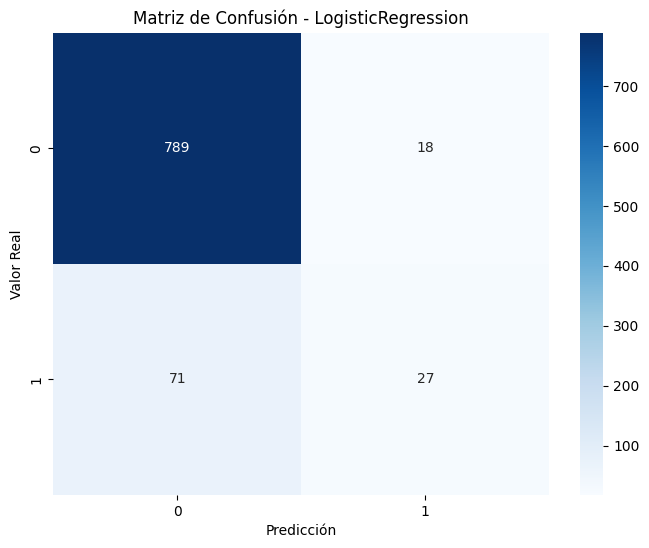

Validación Cruzada - Scores: [0.416      0.41935484 0.42519685 0.43609023 0.43939394]
Validación Cruzada - Media: 0.4272071708122455

Metricas para RandomForestClassifier:
Accuracy: 0.8961325966850828
Precision: 0.5454545454545454
Recall: 0.24489795918367346
F1 Score: 0.3380281690140845


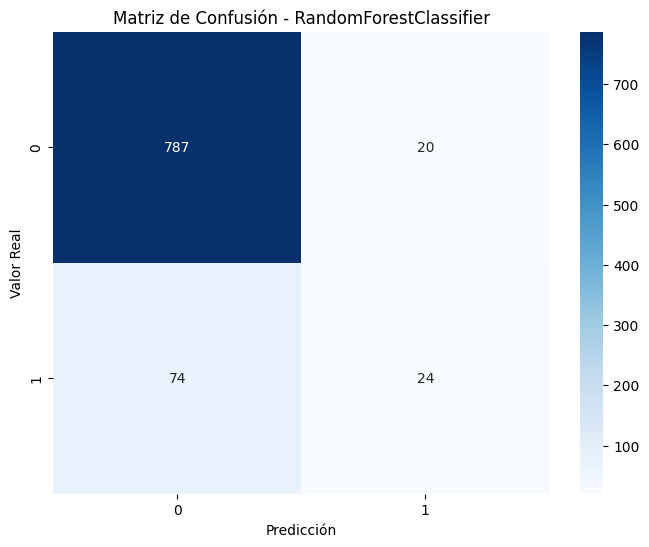

Validación Cruzada - Scores: [0.30769231 0.448      0.42519685 0.4028777  0.41322314]
Validación Cruzada - Media: 0.39939799928472053


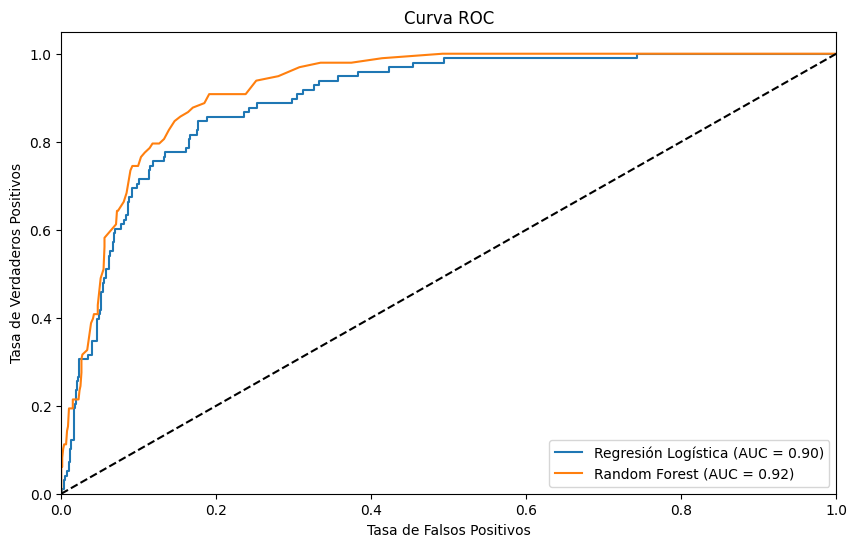

In [73]:
main(df_bank)


Metricas para LogisticRegression:
Accuracy: 0.8989273471193188
Precision: 0.656084656084656
Recall: 0.34097158570119157
F1 Score: 0.4487334137515078


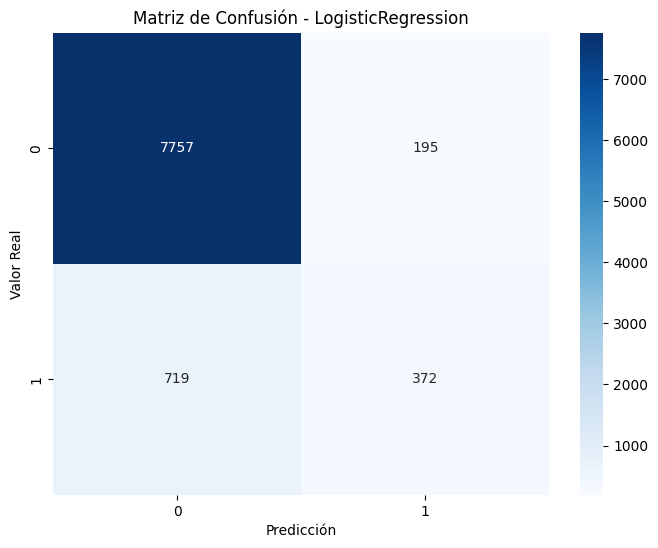

Validación Cruzada - Scores: [0.44304792 0.43818466 0.44513138 0.45333333 0.46436782]
Validación Cruzada - Media: 0.44881302136897644

Metricas para RandomForestClassifier:
Accuracy: 0.9046776512219397
Precision: 0.6583679114799447
Recall: 0.43629697525206235
F1 Score: 0.5248070562293274


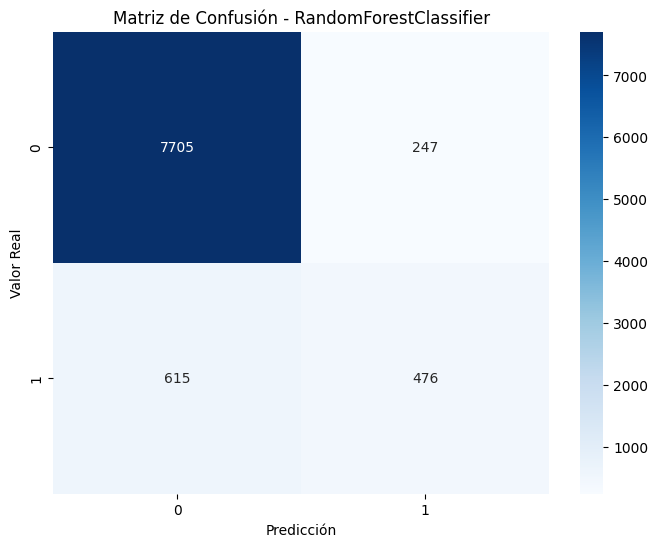

Validación Cruzada - Scores: [0.51561365 0.4996337  0.51351351 0.50147929 0.52563177]
Validación Cruzada - Media: 0.511174384981933


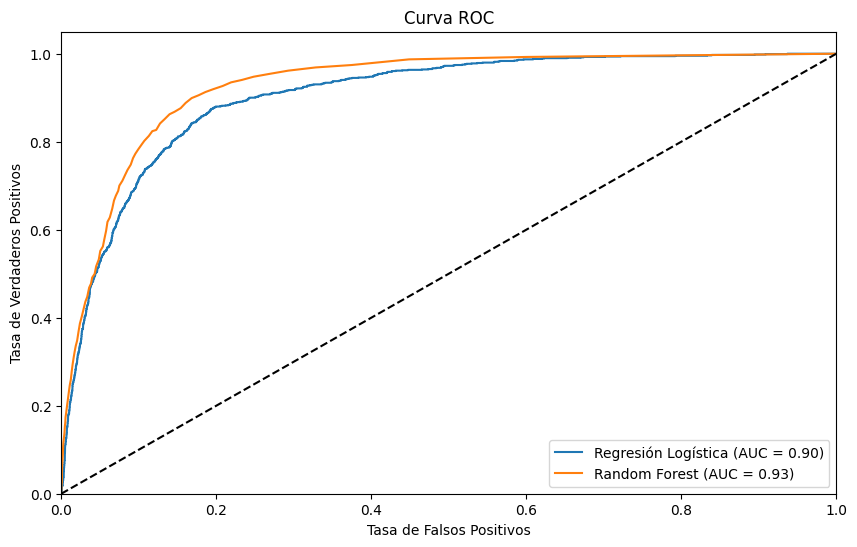

In [74]:
main(df_bankfull)

In [75]:
def preparar_datos_mod(df):
    """Preparar datos para modelado"""
    # Separar características y variable objetivo
    X = df.drop('y', axis=1)
    y = df['y']

    # Identificar columnas
    columnas_numericas = X.select_dtypes(include=['int64', 'float64']).columns
    columnas_categoricas = X.select_dtypes(include=['object']).columns

    # Crear preprocessador
    preprocessador = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), columnas_numericas),
            ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas)
        ])

    # Dividir datos (con estratificación si la variable objetivo está desbalanceada)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    return X_train, X_test, y_train, y_test, preprocessador

In [76]:
def evaluar_modelo_mod(modelo, X_train, X_test, y_train, y_test, preprocessador):
    """Entrenar y evaluar un modelo de clasificación"""
    # Crear pipeline
    pipeline = Pipeline([
        ('preprocessador', preprocessador),
        ('clasificador', modelo)
    ])

    # Entrenar modelo
    pipeline.fit(X_train, y_train)

    # Predicciones
    y_pred = pipeline.predict(X_test)

    # Métricas de evaluación
    print(f"\nMetricas para {type(modelo).__name__}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión - {type(modelo).__name__}')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()

    # Validación cruzada con estratificación
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='f1')
    print("Validación Cruzada - Scores:", cv_scores)
    print("Validación Cruzada - Media:", cv_scores.mean())

    # Si el modelo tiene importancia de características
    if hasattr(modelo, "feature_importances_"):
        feature_importances = modelo.feature_importances_
        print("Importancia de características:", feature_importances)

    return pipeline

In [77]:
# 3. Graficar curva ROC
def graficar_curva_roc_mod(modelos, X_test, y_test):
    """Graficar Curva ROC para múltiples modelos"""
    plt.figure(figsize=(10, 6))

    for nombre, modelo in modelos.items():
        # Verificar si el modelo soporta predict_proba
        if hasattr(modelo, "predict_proba"):
            y_pred_proba = modelo.predict_proba(X_test)[:, 1]
        else:
            y_pred_proba = modelo.decision_function(X_test)
        
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = roc_auc_score(y_test, y_pred_proba)

        plt.plot(fpr, tpr, label=f'{nombre} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

In [83]:
def main_mod(df):
    # Preparar datos
    X_train, X_test, y_train, y_test, preprocessador = preparar_datos_mod(df)

    # Definir modelos
    modelos = {
        'Regresión Logística': LogisticRegression(max_iter=1000, class_weight='balanced'),
        'Random Forest': RandomForestClassifier(n_estimators=100)
    }

    resultados_modelos = {}
    for nombre, modelo in modelos.items():
        resultados_modelos[nombre] = evaluar_modelo_mod(modelo, X_train, X_test, y_train, y_test, preprocessador)


    # Graficar Curva ROC
    graficar_curva_roc(resultados_modelos, X_test, y_test)


Metricas para LogisticRegression:
Accuracy: 0.8232044198895028
Precision: 0.3738738738738739
Recall: 0.7980769230769231
F1 Score: 0.50920245398773


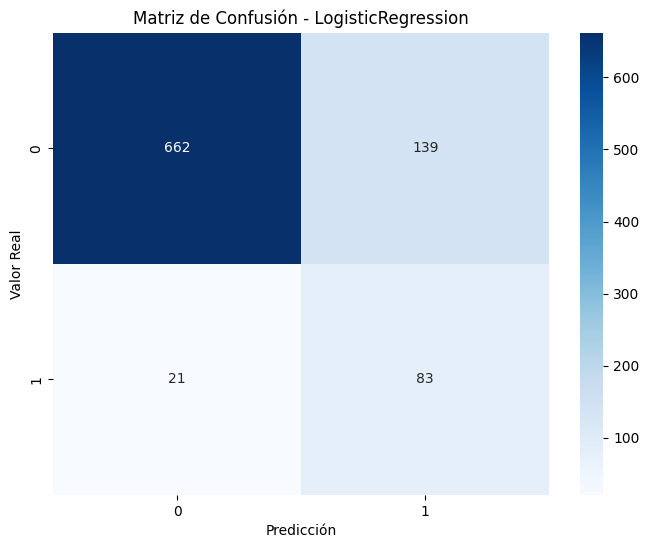

Validación Cruzada - Scores: [0.5560166  0.4627451  0.55776892 0.55895197 0.50196078]
Validación Cruzada - Media: 0.5274886738463211

Metricas para RandomForestClassifier:
Accuracy: 0.8906077348066298
Precision: 0.543859649122807
Recall: 0.2980769230769231
F1 Score: 0.38509316770186336


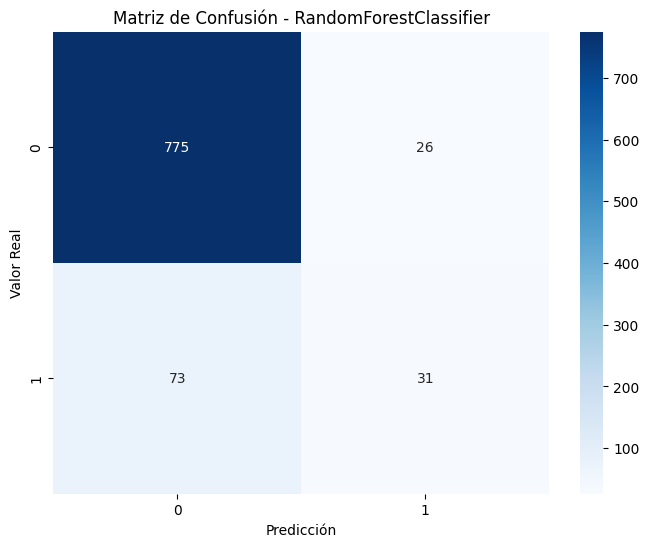

Validación Cruzada - Scores: [0.33057851 0.46031746 0.54961832 0.41025641 0.390625  ]
Validación Cruzada - Media: 0.42827914071625034
Importancia de características: [0.09480897 0.01068128 0.00371074 0.09594814 0.01936228 0.00834882
 0.08490965 0.28316035 0.04094735 0.03802399 0.02317925 0.0104861
 0.01378991 0.01130408 0.00865224 0.01458745 0.01530305 0.00670461
 0.01104376 0.00695402 0.01010519 0.0102377  0.01241736 0.00277823
 0.01066421 0.00296637 0.00840075 0.01229619 0.01330046 0.01161848
 0.01018455 0.02198299 0.00530654 0.00879397 0.00478413 0.0441697
 0.00808714]


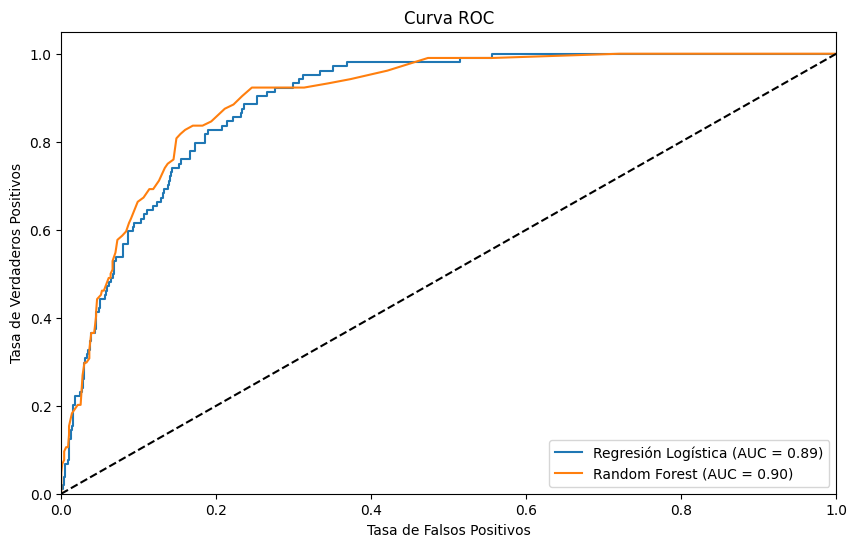

In [84]:
main_mod(df_bank)


Metricas para LogisticRegression:
Accuracy: 0.8457370341700763
Precision: 0.41808458920758385
Recall: 0.8128544423440454
F1 Score: 0.5521669341894061


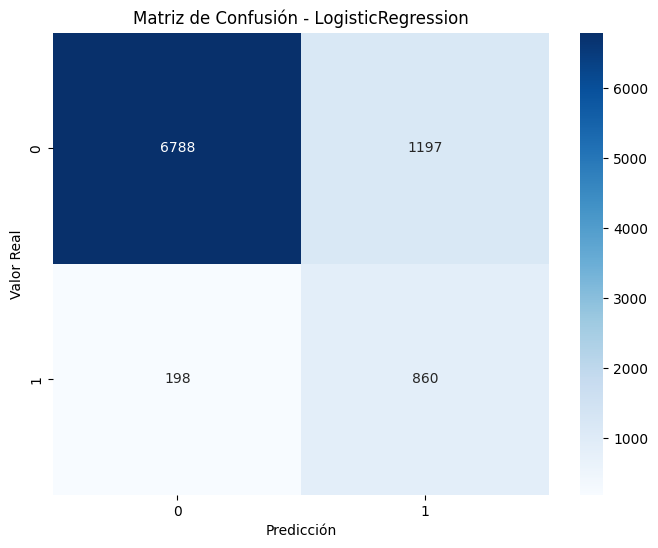

Validación Cruzada - Scores: [0.55791583 0.5547619  0.54808853 0.55837967 0.53422502]
Validación Cruzada - Media: 0.5506741907367625

Metricas para RandomForestClassifier:
Accuracy: 0.9074422205020458
Precision: 0.6676783004552352
Recall: 0.4158790170132325
F1 Score: 0.512521840419336


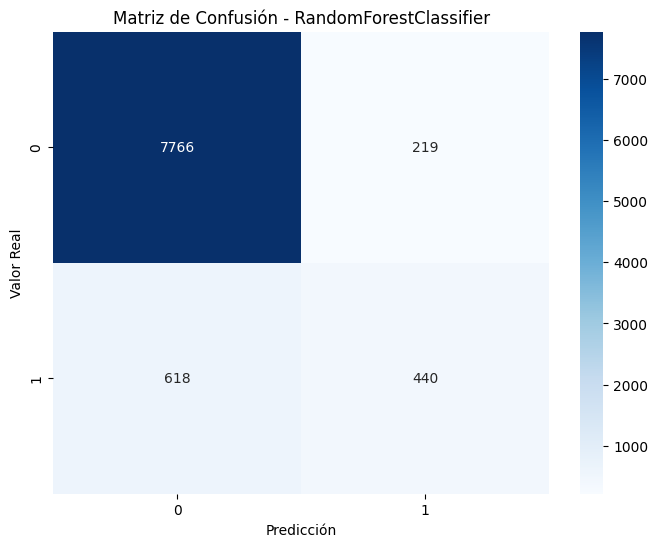

Validación Cruzada - Scores: [0.47918188 0.52779733 0.4840386  0.52449568 0.51959361]
Validación Cruzada - Media: 0.5070214211773407
Importancia de características: [0.10164414 0.00950894 0.00190106 0.10467169 0.0235033  0.01007426
 0.09173662 0.2834479  0.0420912  0.04010701 0.02064959 0.00765513
 0.01096452 0.00971156 0.0080081  0.01305844 0.01257849 0.00581526
 0.00892802 0.00468113 0.00912264 0.01292659 0.00938769 0.00435208
 0.00837449 0.00516246 0.00855339 0.0125018  0.01301401 0.00986765
 0.00751099 0.01081911 0.00742058 0.00897001 0.00491348 0.04855113
 0.00781555]


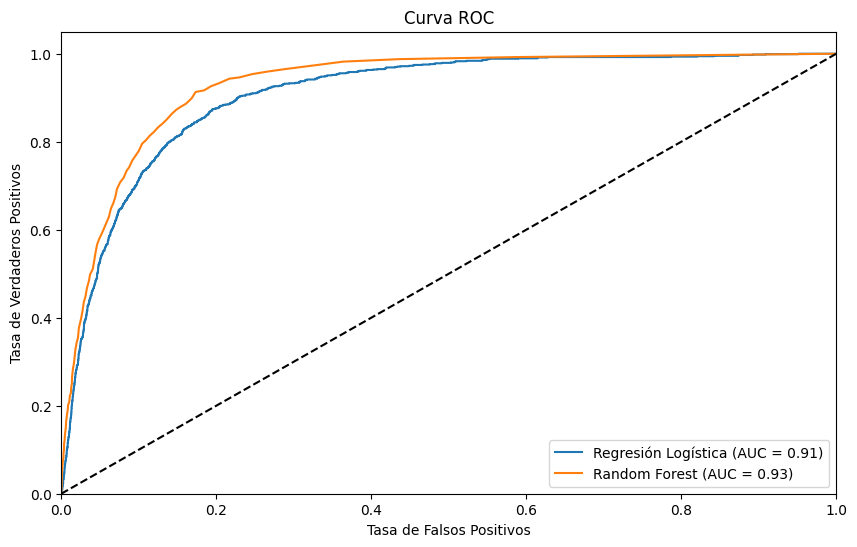

In [85]:
main_mod(df_bankfull)